## <font color=blue>Jupyter Setup<font/>

###  Import required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 50)

## <font color=blue>Data Load<font/>

### Load data:

In [3]:
df = pd.read_csv('kc_house_data.csv')

### Preview data:

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## <font color=blue>Exploratory Data Analysis</font>

### Identify variables and variable Types:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Upon inital inspection:

1. Three variables have null values: **`waterfront`**, **`view`** and **`yr_renovated`**
2. **`date`** looks to be a string variable instead of datetime

###############################################################

### Inspect each variable individually, looking for any further integrity issues

###  <font color=green>id</font>

Would it be possible to use **`id`** as the index column?

In [6]:
len(df['id'].unique())

21420

No, as there are duplicate ids within the column which indicates that the same property has been sold multiple times within the time frame of the dataset.

A follow up question is whether it would be worth creating a derived variable that flags those properties that have been sold multiple times to be used as possible input variable fo rthe regression model?

In [7]:
id_vc = pd.DataFrame(df['id'].value_counts())  # Check how many times properties appear within the dataset
id_vc = id_vc.reset_index()
id_vc.columns

number_of_unique_ids = len(id_vc.loc[id_vc['id'] > 1].sort_values(by = 'id', ascending = False))

print('{}'.format(round((number_of_unique_ids / len(id_vc))*100, 2)) + '% of properties were sold multiple times')

0.82% of properties were sold multiple times


Properties sold multiple times only account for 0.82% of all unique properties within the dataset and therefore there is no real value in deriving a variable to flag 'number of times sold'

### <br><font color=green>date</font>

In [8]:
df['date'].describe()
type(df['date'][0])

df['date'].sort_values(ascending=True).head()

12076    1/10/2015
19359    1/12/2015
2548     1/12/2015
18398    1/12/2015
11086    1/12/2015
Name: date, dtype: object

the **`date`** variable is stored as a str object and needs to be converted to **datetime** format

In [9]:
df['date'] = pd.to_datetime(df['date'])

Verifying the modification has worked:

In [10]:
df['date'].sort_values(ascending=True).head()

7316    2014-05-02
20586   2014-05-02
1040    2014-05-02
20543   2014-05-02
9587    2014-05-02
Name: date, dtype: datetime64[ns]

In [11]:
df['date'].sort_values(ascending=False).head()

16580   2015-05-27
13040   2015-05-24
5632    2015-05-15
12623   2015-05-14
19381   2015-05-14
Name: date, dtype: datetime64[ns]

In [12]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### <font color=green>price</font>

In [13]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [14]:
type(df['price'][0])

numpy.float64

**`price`** variable type is fine

### <font color=green>bedrooms</font>

In [15]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [16]:
print(type(df['bedrooms'][0]))
df['bedrooms'].value_counts()

<class 'numpy.int64'>


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

**`bedrooms`** variable is of correct type but there does seem to be some extreme values: 33, 11 and 10

Outliers will be dealt with later

### <font color=green>bathrooms</font>

In [17]:
df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [18]:
print(type(df['bathrooms'][0]))
df['bathrooms'].value_counts()

<class 'numpy.float64'>


2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

**`bathrooms`** variable is of correct type but there could be possible extreme outliers of bathrooms per bedroom > 6

### <font color=green>sqft_living</font>

In [19]:
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [20]:
print(type(df['sqft_living'][0]))
df['sqft_living'].value_counts()

<class 'numpy.int64'>


1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

**`sqft_living`** variable is fine

### <font color=green>sqft_lot</font>

In [21]:
df['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [22]:
print(type(df['sqft_lot'][0]))
df['sqft_lot'].value_counts()

<class 'numpy.int64'>


5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

**`sqft_lot`** variable is of correct type but there does seem to be some extreme values: 1,651,359 sq ft.<br>

Outliers will be dealt with later

### <font color=green>floors</font>

In [23]:
df['floors'].describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [24]:
type(df['floors'][0])
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

**`floors`** is of correct type

### <font color=green>waterfront</font>

In [25]:
df['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [26]:
df['waterfront'].isna().sum()

2376

the **`waterfront`** variable has 2,376 missing values

In [27]:
print(type(df['waterfront'][0]))
df['waterfront'].value_counts()

<class 'numpy.float64'>


0.0    19075
1.0      146
Name: waterfront, dtype: int64

the variable is of correct boolean type

the missing will need to be imputed with a placeholder value: **9.0**

In [28]:
df['waterfront'] = df['waterfront'].fillna(9.0)

Verifying the imputation has worked:

In [29]:
df['waterfront'].value_counts()

0.0    19075
9.0     2376
1.0      146
Name: waterfront, dtype: int64

### <font color=green>view</font>

In [30]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [31]:
df['view'].isna().sum()

63

the **`view`** variable has 63 missing values

In [32]:
type(df['view'][0])

numpy.float64

the variable is of correct numerical type

the missing will need to be imputed with a placeholder value: median of non-null **`view`**

In [33]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [34]:
view_median = df['view'].loc[df['view'].isna() == False].median()
print(view_median)

0.0


In [35]:
df['view'] = df['view'].fillna(view_median)

Verifying the imputation has worked:

In [36]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [37]:
df['view'].describe()

count    21597.000000
mean         0.233181
std          0.764673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

### <font color=green>condition</font>

In [38]:
print(df['condition'].describe(),'\n')
print(type(df['condition'][0]))
df['condition'].value_counts()

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64 

<class 'numpy.int64'>


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

**`condition`** is of correct type

### <font color=green>grade</font>

In [39]:
print(df['grade'].describe(), '\n')
print(type(df['grade'][0]))
df['grade'].value_counts()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64 

<class 'numpy.int64'>


7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

**`grade`** is of correct type

### <font color=green>sqft_above</font>

In [40]:
print(df['sqft_above'].describe(), '\n')
print(type(df['sqft_above'][0]))
df['sqft_above'].value_counts()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64 

<class 'numpy.int64'>


1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

### <font color=green>sqft_basement</font>

In [41]:
print(df['sqft_basement'].describe(), '\n')
print(type(df['sqft_basement'][0]))
df['sqft_basement'].value_counts()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object 

<class 'str'>


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
225.0         1
518.0         1
704.0         1
861.0         1
2490.0        1
Name: sqft_basement, Length: 304, dtype: int64

There is a random '?' value within the **`sqft_basement`** variable and needs to be treated as a missing value but since we want to convert the variable to of numerical type we need to replace the '?' with a numerical missing value placeholder.

First need to check the median value for all values != '?'

In [42]:
sqft_basement_median = df['sqft_basement'].loc[df['sqft_basement'] != '?'].median()
print(sqft_basement_median)

0.0


replace '?' with '0.0':

In [43]:
df['sqft_basement'] = df['sqft_basement'].replace('?',str(sqft_basement_median))

Verify imputation:

In [44]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
225.0         1
518.0         1
704.0         1
861.0         1
2490.0        1
Name: sqft_basement, Length: 303, dtype: int64

<br> The **`sqft_basement`** variable is stored as a str needs to be converted into a format

In [45]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

Verify modification:

In [46]:
print(df['sqft_basement'].describe(), '\n')
print(df['sqft_basement'].isna().sum(), '\n')
df['sqft_basement'].head()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64 

0 



0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

### <font color=green>yr_built</font>

In [47]:
print(df['yr_built'].describe(), '\n')
print(type(df['yr_built'][0]))
df['yr_built'].value_counts()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64 

<class 'numpy.int64'>


2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

Will be usefule to bin this variable into decades.

Will be done later on

### <font color=green>yr_renovated</font>

In [48]:
print(df['yr_renovated'].describe(), '\n')
print(type(df['yr_renovated'][0]))
df['yr_renovated'].value_counts()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64 

<class 'numpy.float64'>


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

* Missing values seem to exist
* a value of 0.0 is assumed to mean not renovated

In [49]:
df['yr_renovated'].isna().sum()

3842

3,842 missing values need to be imputed

First need to check whether 2050.0 will be a safe choice for a missing value placeholder:

In [50]:
sorted(df['yr_renovated'].loc[df['yr_renovated'] != 0.0].map(lambda x:float(x)).unique(), reverse = True)

[nan,
 2015.0,
 2014.0,
 2013.0,
 2012.0,
 2011.0,
 2010.0,
 2009.0,
 2008.0,
 2007.0,
 2006.0,
 2005.0,
 2004.0,
 2003.0,
 2002.0,
 2001.0,
 2000.0,
 1999.0,
 1998.0,
 1997.0,
 1996.0,
 1995.0,
 1994.0,
 1993.0,
 1992.0,
 1991.0,
 1990.0,
 1989.0,
 1988.0,
 1987.0,
 1986.0,
 1985.0,
 1984.0,
 1983.0,
 1982.0,
 1981.0,
 1980.0,
 1979.0,
 1978.0,
 1977.0,
 1976.0,
 1975.0,
 1974.0,
 1973.0,
 1972.0,
 1971.0,
 1970.0,
 1969.0,
 1968.0,
 1967.0,
 1965.0,
 1964.0,
 1963.0,
 1962.0,
 1960.0,
 1959.0,
 1958.0,
 1957.0,
 1956.0,
 1955.0,
 1954.0,
 1953.0,
 1951.0,
 1950.0,
 1948.0,
 1946.0,
 1945.0,
 1944.0,
 1940.0,
 1934.0]

2050.0 will be a safe choice to represent missing values:

In [51]:
df['yr_renovated'] = df['yr_renovated'].fillna(2050.0)

# verify imputation
df['yr_renovated'].value_counts()

0.0       17011
2050.0     3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1950.0        1
1954.0        1
1959.0        1
1951.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

### <font color=green>zipcode</font>

In [52]:
print(df['zipcode'].describe(), '\n')
print(df['zipcode'].head(), '\n')
print(type(df['zipcode'][0]), '\n')
print(df['zipcode'].value_counts(), '\n')
df['zipcode'].isna().sum()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64 

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: int64 

<class 'numpy.int64'> 

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64 



0

**`zipcode`** is of correct type

#### <font color=green>lat</font>

In [53]:
print(df['lat'].describe(), '\n')
print(df['lat'].head(), '\n')
print(type(df['lat'][0]))

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64 

0    47.5112
1    47.7210
2    47.7379
3    47.5208
4    47.6168
Name: lat, dtype: float64 

<class 'numpy.float64'>


**`lat`** is of correct type

### <font color=green>long</font>

In [54]:
print(df['long'].describe(), '\n')
print(df['long'].head(), '\n')
print(type(df['long'][0]))

count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64 

0   -122.257
1   -122.319
2   -122.233
3   -122.393
4   -122.045
Name: long, dtype: float64 

<class 'numpy.float64'>


**`long`** is of correct type

### <font color=green>sqft_living15</font>

In [55]:
print(df['sqft_living15'].describe(), '\n')
print(df['sqft_living15'].head(), '\n')
print(type(df['sqft_living15'][0]), '\n')
df['sqft_living15'].value_counts()

count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64 

0    1340
1    1690
2    2720
3    1360
4    1800
Name: sqft_living15, dtype: int64 

<class 'numpy.int64'> 



1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

### <font color=green>sqft_lot15</font>

In [56]:
print(df['sqft_lot15'].describe(), '\n')
print(df['sqft_lot15'].head(), '\n')
print(type(df['sqft_lot15'][0]), '\n')
df['sqft_lot15'].value_counts()

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64 

0    5650
1    7639
2    8062
3    5000
4    7503
Name: sqft_lot15, dtype: int64 

<class 'numpy.int64'> 



5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

This is the original structure of the dataframe:

<img src="orig_df_info.png" width = "400">

and this is the new structure after cleaning process cleaning:

##### <font color=red>Cleaned Dataset Formats</font>

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

### Derive Variables

#### `day_of_week`, `month`, `quarter` derived from `date`

In [58]:
#   Useful to extract the day, month and quarter from the date variable:

df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<BarContainer object of 372 artists>

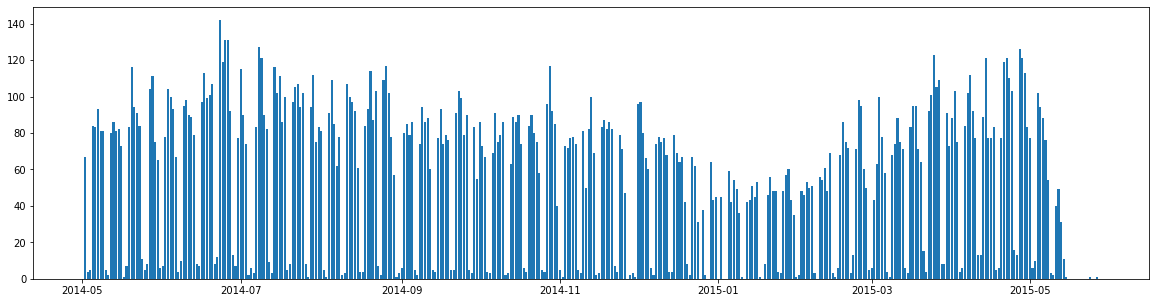

In [59]:
fig = plt.figure(figsize=(20,5))
plt.bar(df['date'].value_counts().index, df['date'].value_counts())

<BarContainer object of 7 artists>

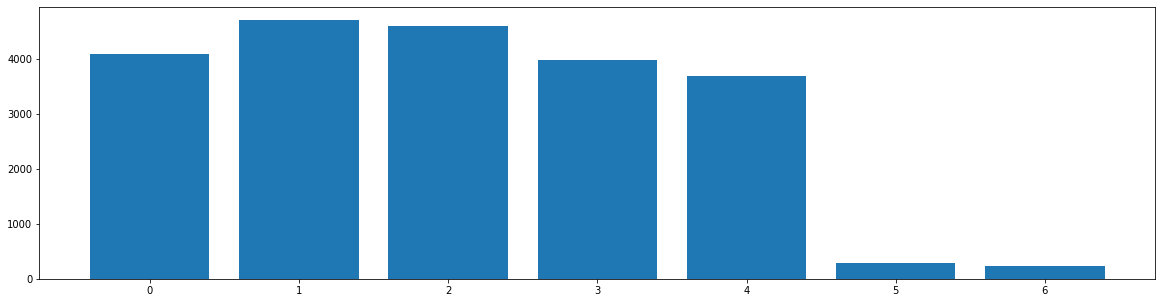

In [60]:
fig = plt.figure(figsize=(20,5))
plt.bar(df['day_of_week'].value_counts().index, df['day_of_week'].value_counts())

<BarContainer object of 12 artists>

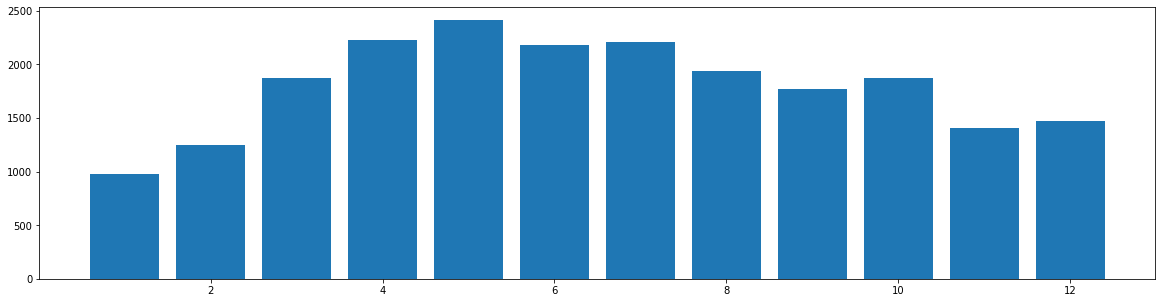

In [61]:
fig = plt.figure(figsize=(20,5))
plt.bar(df['month'].value_counts().index, df['month'].value_counts())

<BarContainer object of 4 artists>

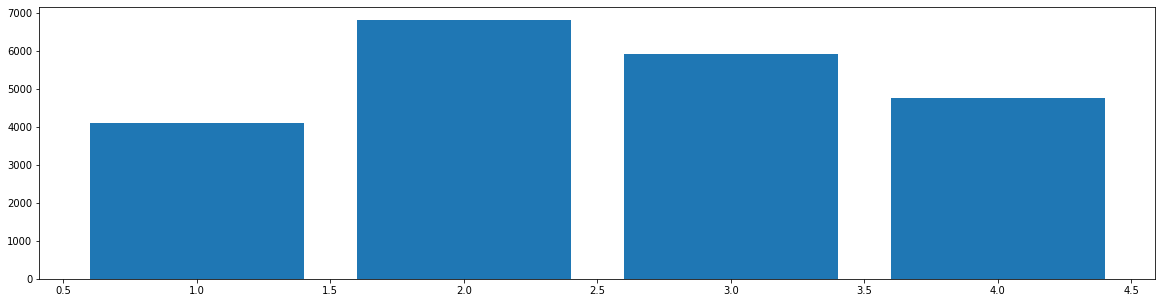

In [62]:
fig = plt.figure(figsize=(20,5))
plt.bar(df['quarter'].value_counts().index, df['quarter'].value_counts())

#### `distance_from_town_centre` derived from `long` and `lat`

In [63]:
from math import sin, cos, sqrt, atan2, radians

In [64]:

def distance_calc(long_lat, city_centre_long_lat = [-122.3341, 47.6106]):
    
    # approximate radius of earth in km
    R = 6373.0
    city_centre_lon = radians(city_centre_long_lat[0])
    city_centre_lat = radians(city_centre_long_lat[1])
    
    addres_lon = radians(float(long_lat.split(',')[0]))
    address_lat = radians(float(long_lat.split(',')[1]))

    dlon = city_centre_lon - addres_lon
    dlat = city_centre_lat - address_lat

    a = sin(dlat / 2)**2 + cos(city_centre_lat) * cos(address_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return distance

In [65]:
df['long_lat_coords'] = df["long"].map(str) + "," + df["lat"].map(str)

In [66]:
df['dist_from_city_centre'] = df['long_lat_coords'].apply(lambda x: distance_calc(x))

In [67]:
df.loc[:,['zipcode','long', 'lat', 'dist_from_city_centre']].head()

,zipcode,long,lat,dist_from_city_centre
0,98178,-122.257,47.5112,12.479186
1,98125,-122.319,47.7210,12.331758
2,98028,-122.233,47.7379,16.057023
3,98136,-122.393,47.5208,10.922917
4,98074,-122.045,47.6168,21.688510


In [68]:
df = df.loc[:,df.columns != 'long_lat_coords']

#### `livingsqft_lotsqft_ratio` derived from `sqft_living` and `sqft_lot`

In [69]:
df['livingsqft_lotsqft_ratio'] = df['sqft_living']/df['sqft_lot']

In [70]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_week,month,quarter,dist_from_city_centre,livingsqft_lotsqft_ratio
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,9.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,4,12.479186,0.208850
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,4,12.331758,0.354874
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,2050.0,98028,47.7379,-122.233,2720,8062,2,2,1,16.057023,0.077000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,12,4,10.922917,0.392000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2,1,21.688510,0.207921


### Identify and Handle Outliers

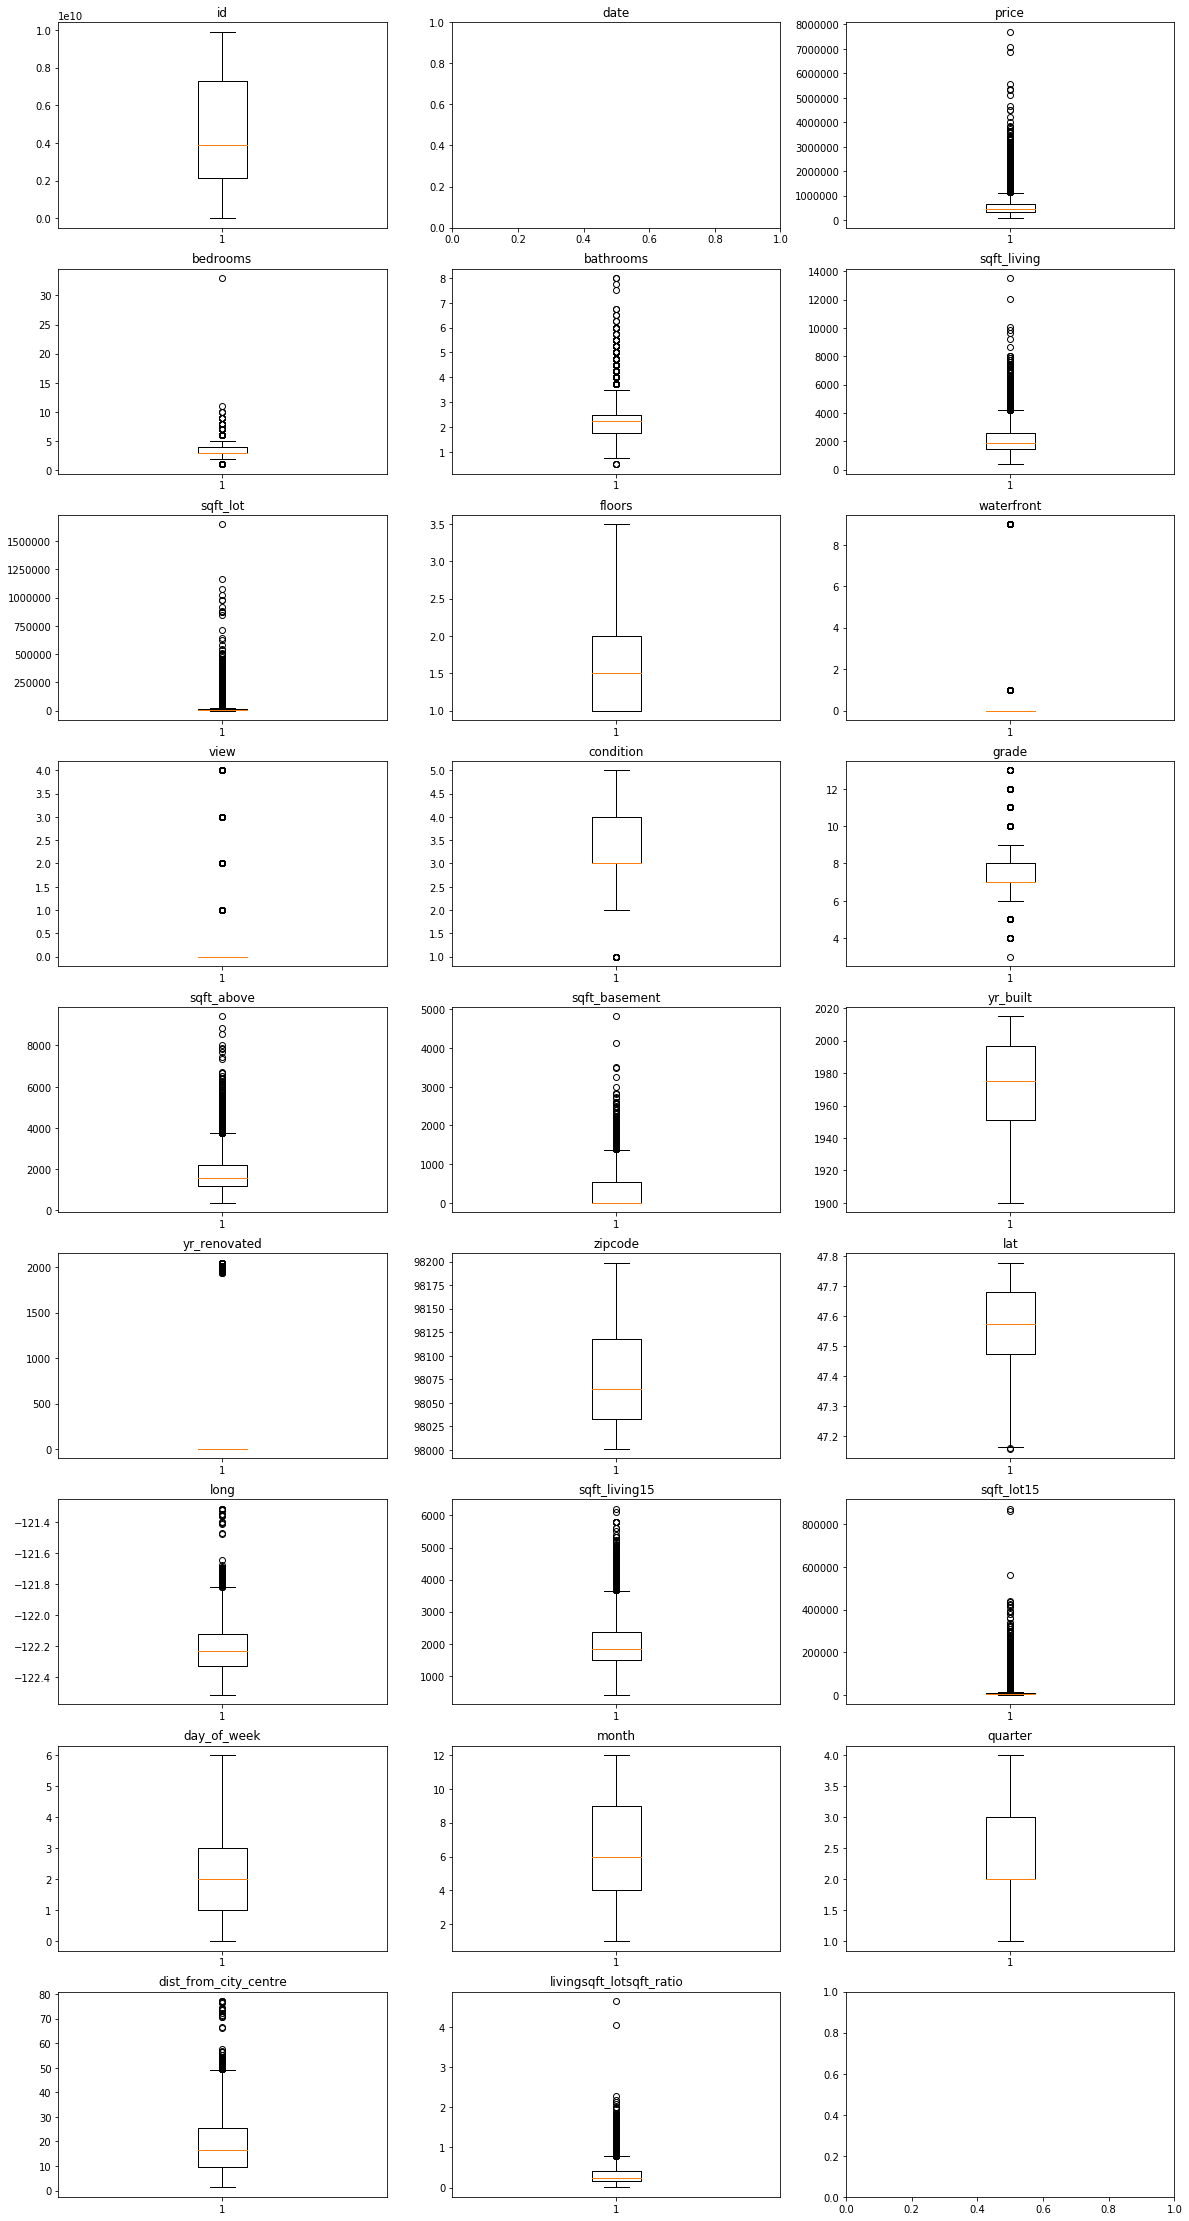

In [71]:
fig2, axes2 = plt.subplots(9, 3, figsize = (20,40))
axes2.shape


for n in range(1,27):
    
    i = df.dtypes.index[n-1]
    
    row = (n-1)//3
    col = (n-1)%3
    
    if str(type(df[str(i)][0])) in ["<class 'numpy.float64'>", "<class 'numpy.int64'>"]:
        ax = axes2[row][col]
        ax.boxplot(df[str(i)])
        ax.set_title('{}'.format(i))
    else:   
        ax = axes2[row][col]
        ax.set_title('{}'.format(i))
        continue

Initial observations:

* **`bedrooms`**, **`sqft_lot`**, **`sqft_basement`**, **`sqft_lot15`** have clear extreme outliers which require removing/imputation
* **`bathrooms`** may have possible outliers of >6
* boxplots for **`view`**, **`yr_renovated`** have been doistorted due to the previous step of imputing values for the missing observations. The box plot will have to be re-run without these imputed observations


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


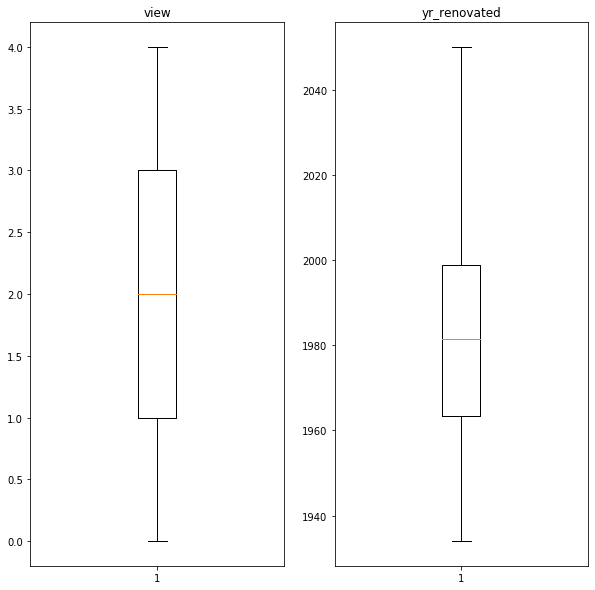

In [72]:
fig2, axes2 = plt.subplots(1, 2, figsize = (10,10))
axes2.shape

col = (-1)
for n in range(1,27):
    
    i = df.dtypes.index[n-1]
    
    row = 1
    
    
    if i in ['view']:
        
        col += 1
        a = [x for x in df[str(i)].value_counts().index if x != 9999.0]
        b = [df[str(i)].value_counts().ix[x] for x in df[str(i)].value_counts().index if x != 9999.0]
        

        ax = axes2[col]
        ax.boxplot(a)
        ax.set_title('{}'.format(i))
        
    elif i in ['yr_renovated']:
        
        col += 1
        a = [x for x in df[str(i)].value_counts().index if (x != 9999.0) and (x != 0.0)]
        b = [df[str(i)].value_counts().ix[x] for x in df[str(i)].value_counts().index if x != 9999.0]
        
       
        ax = axes2[col]
        ax.boxplot(a)
        ax.set_title('{}'.format(i))
    else:   
        continue

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


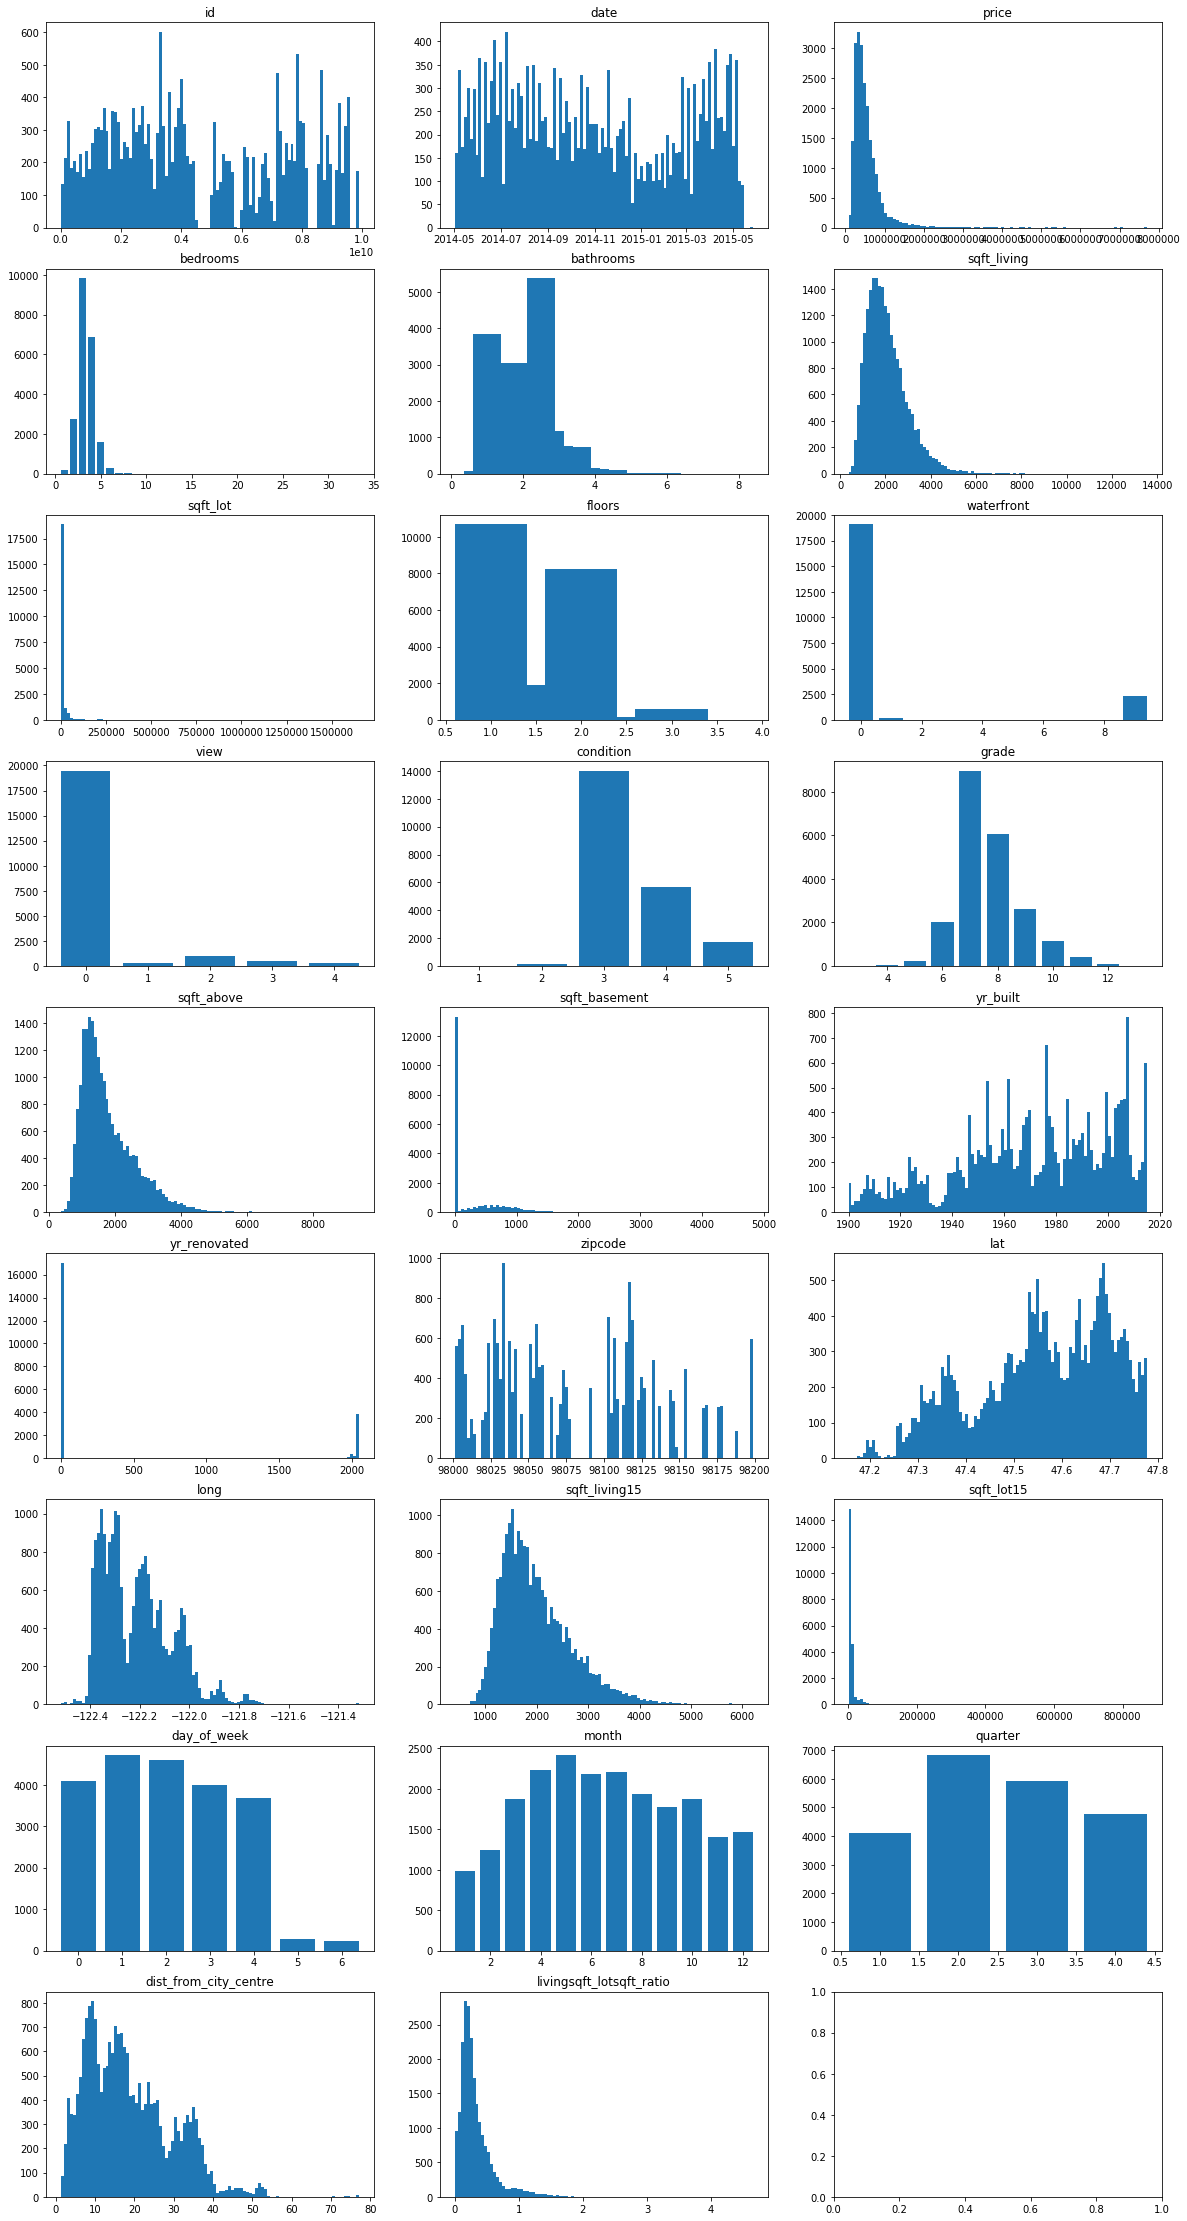

In [73]:
fig, axes = plt.subplots(9, 3, figsize = (20,40))
axes.shape


for n in range(1,27):
    
    i = df.dtypes.index[n-1]
    
    row = (n-1)//3
    col = (n-1)%3
    
    if len(df[str(i)].unique()) > 50:
        #continue
        ax = axes[row][col]
        ax.set_title('{}'.format(i))
        ax.hist(df[str(i)], bins = 100)
        continue
    
    a = [x for x in df[str(i)].value_counts().index if x != 9999.0]
    b = [df[str(i)].value_counts().ix[x] for x in df[str(i)].value_counts().index if x != 9999.0]
        
    ax = axes[row][col]
    ax.bar(a, b)
    ax.set_title('{}'.format(i))  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


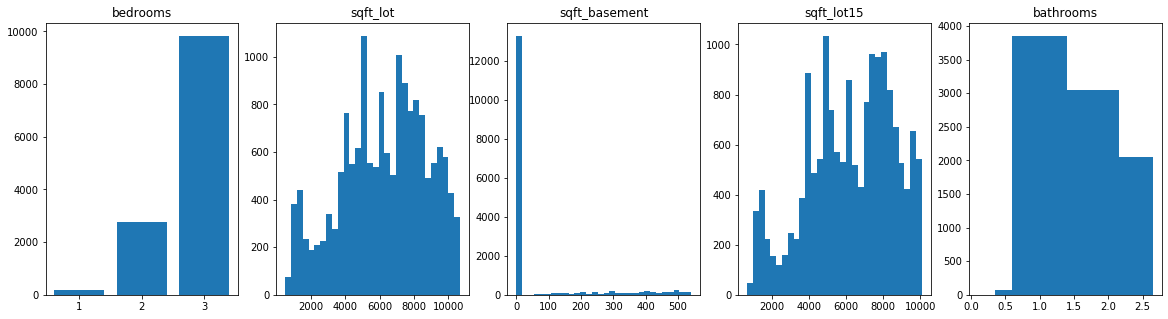

In [74]:
outl_vars = ['bedrooms', 'sqft_lot', 'sqft_basement', 'sqft_lot15', 'bathrooms']
def remove_outliers_and_plot_bars(list_of_vars):
    
    fig2, axes2 = plt.subplots(1, 5, figsize = (20,5))

    col = (-1)
    
    for i in list_of_vars:
        
            
        col += 1
    
        pcntle = np.percentile(df[str(i)], 75)
        
        
        
        if len(df[str(i)].unique()) > 50:
            ax = axes2[col]
            ax.hist(df[str(i)].loc[df[str(i)] < pcntle], bins = 30)
            ax.set_title('{}'.format(i))
    
            continue
    
        else:

            a = [x for x in df[str(i)].value_counts().index if x < pcntle]
            b = [df[str(i)].value_counts().ix[x] for x in df[str(i)].value_counts().index if x < pcntle]
            
            ax = axes2[col]
            ax.bar(a, b)
            ax.set_title('{}'.format(i))
    
    col = (-1)
        
remove_outliers_and_plot_bars(outl_vars)

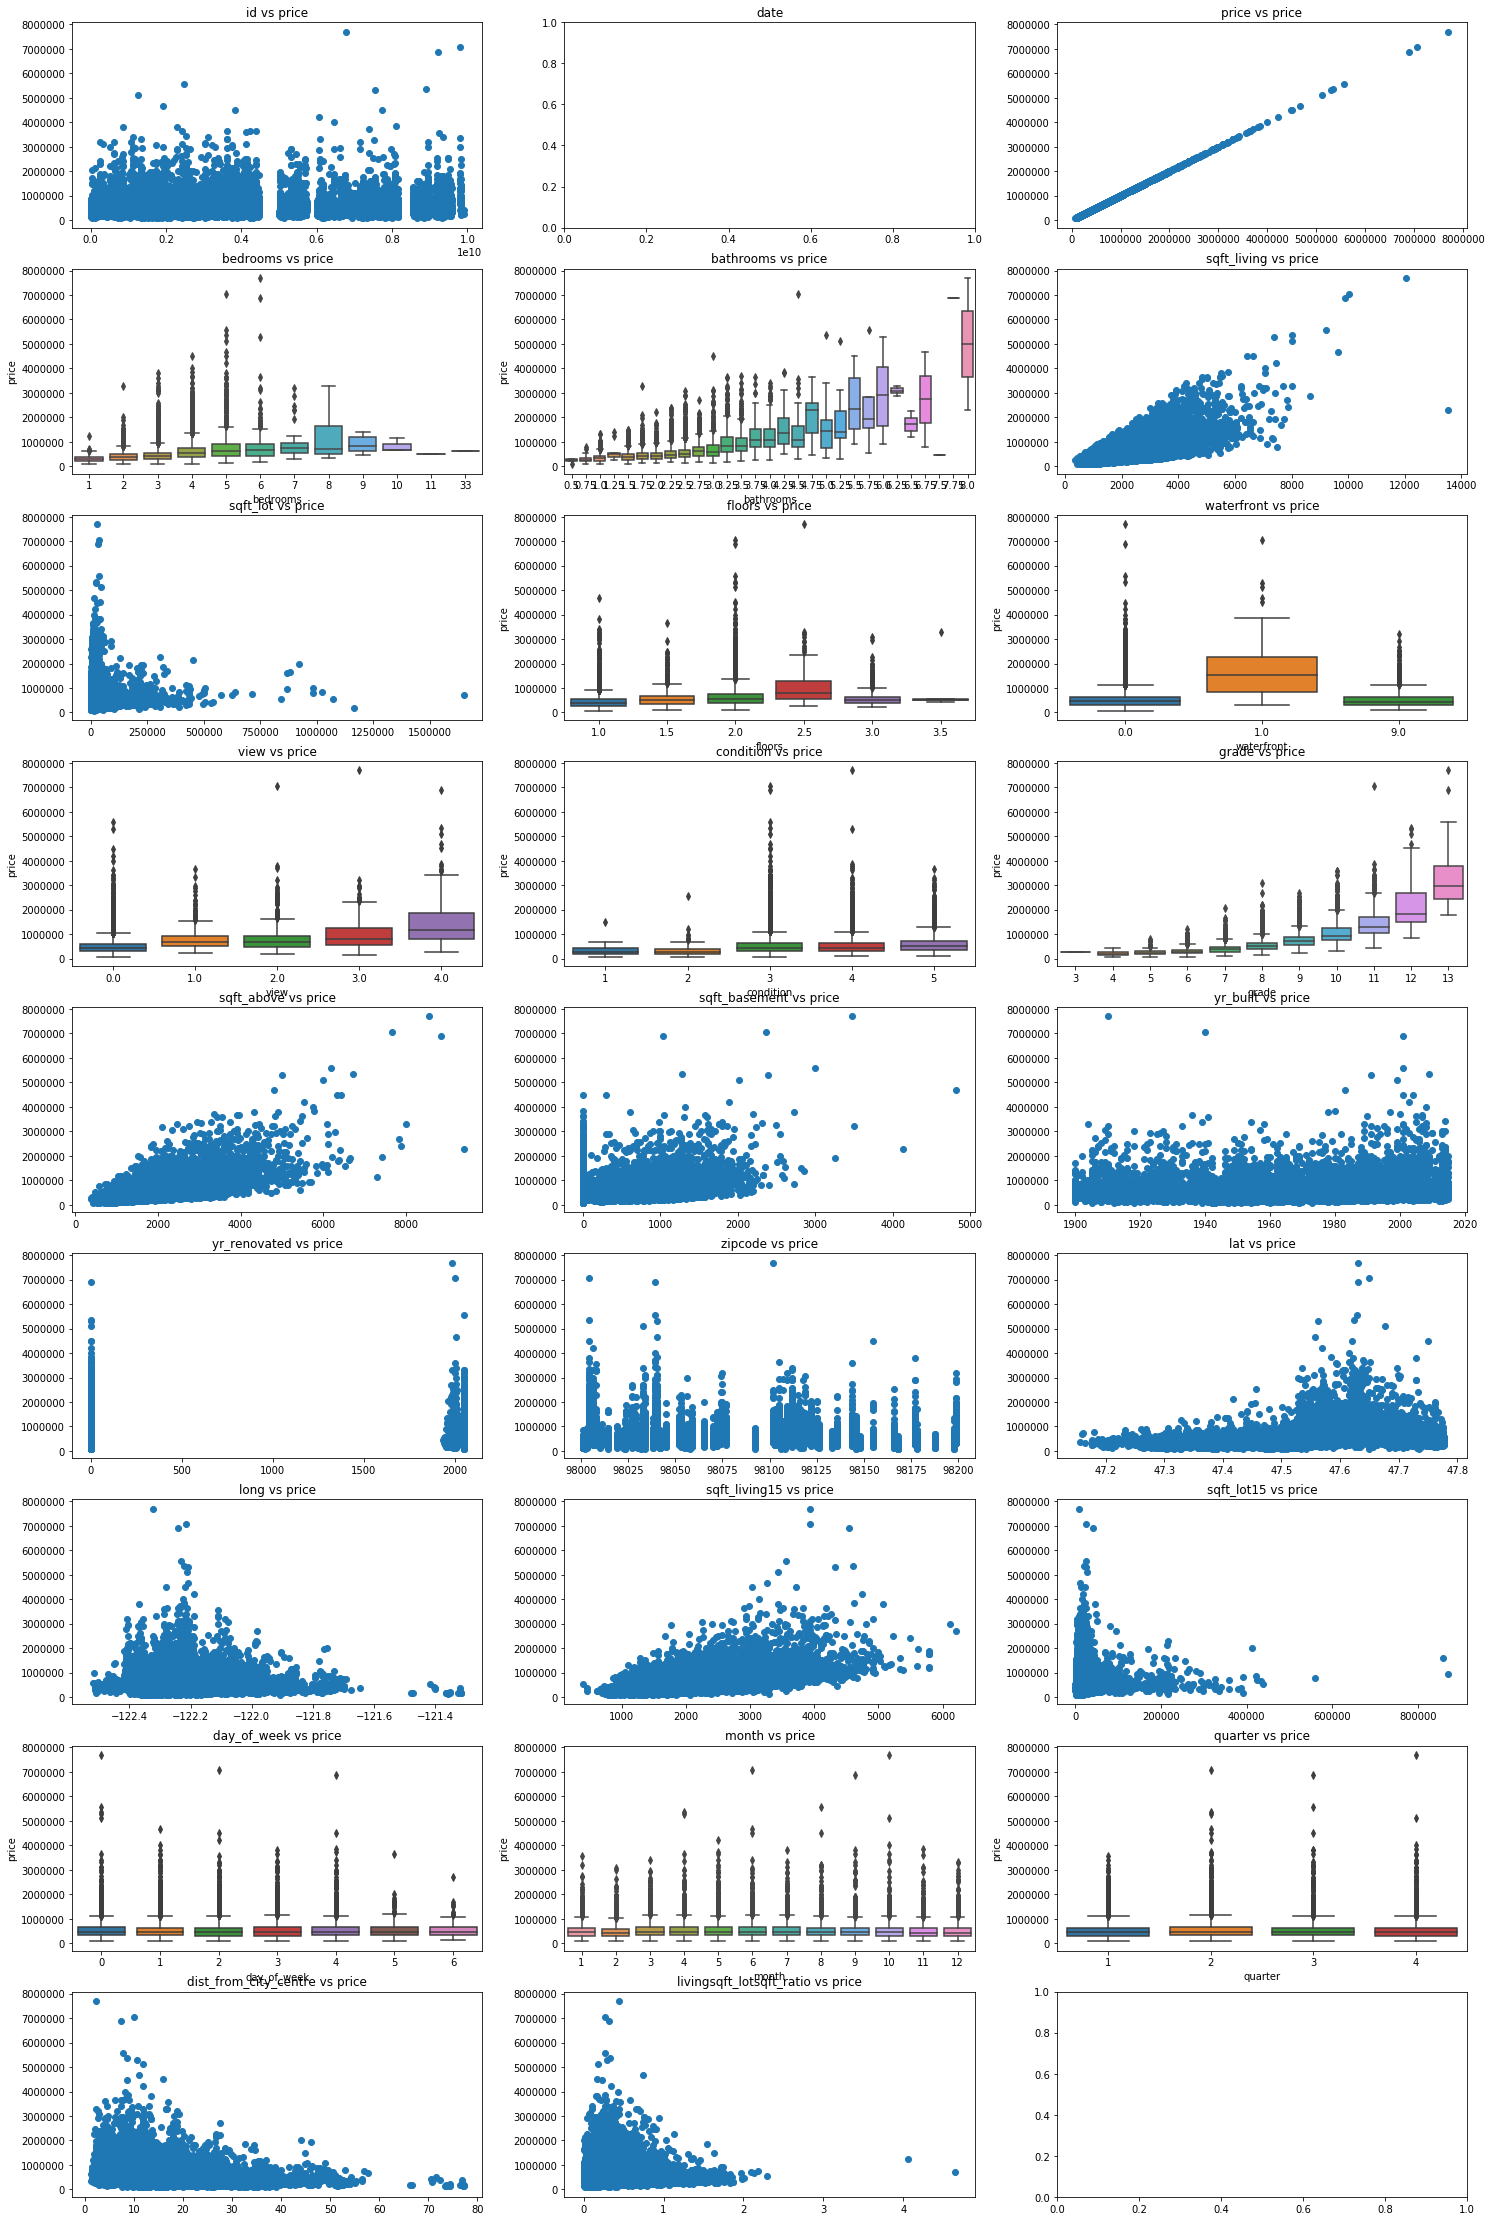

In [75]:
fig3, axes3 = plt.subplots(9, 3, figsize = (25,40))
axes3.shape


for n in range(1,27):
    
    i = df.dtypes.index[n-1]
    
    row = (n-1)//3
    col = (n-1)%3
    
    if str(type(df[str(i)][0])) in ["<class 'numpy.float64'>", "<class 'numpy.int64'>"]:
        
        if (len(df[str(i)].unique()) > 12) and (str(i) not in ['bathrooms']):
        
            ax = axes3[row][col]
            ax.scatter(df[str(i)], df['price'])
            ax.set_title('{}'.format(i) + ' vs price')
            
        
        else:
            ax = axes3[row][col]
            sns.boxplot(str(i), 'price', data=df, ax=ax)
            ax.set_title('{}'.format(i) + ' vs price')
    else:   
        ax = axes3[row][col]
        ax.set_title('{}'.format(i))
        continue

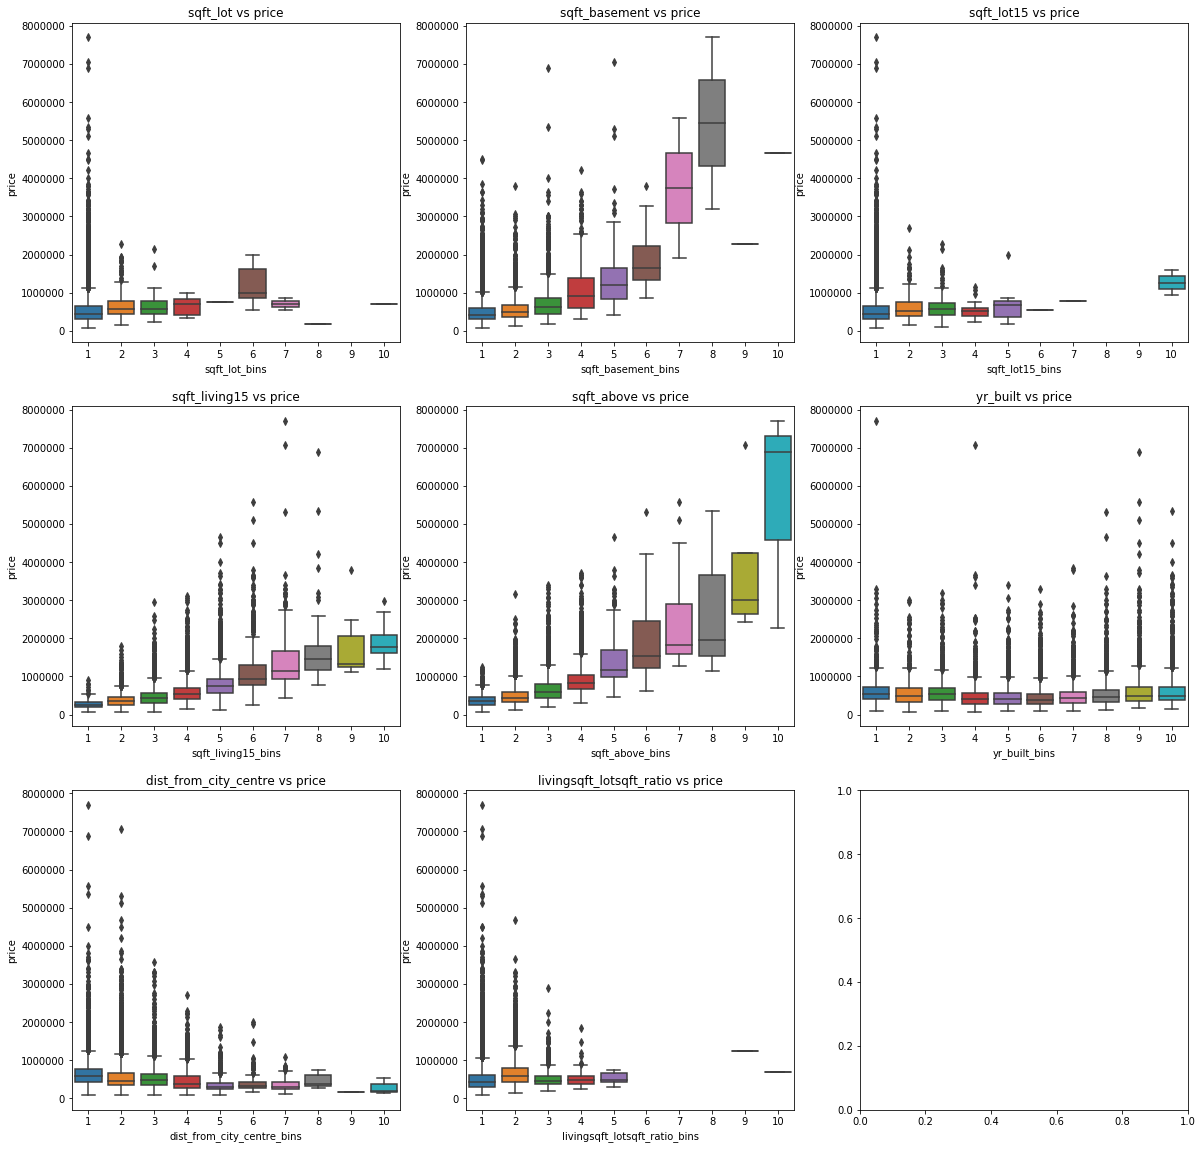

In [76]:
outl_vars = ['sqft_lot', 'sqft_basement', 'sqft_lot15', 'sqft_living15'
             , 'sqft_above', 'yr_built', 'dist_from_city_centre'
             ,'livingsqft_lotsqft_ratio']


for i in outl_vars:
    
    df[(str(i) + '_bins')] = pd.cut(df[str(i)], 10, labels = list(range(1,11)))
    
    


def remove_outliers_and_plot_grouped_boxes(list_of_vars):
    
    fig2, axes2 = plt.subplots(3, 3, figsize = (20,20))

   
    n = (-1)
    for i in list_of_vars:
        
        n += 1
        
        row = (n)//3
        col = (n)%3
        
        ax = axes2[row][col]
        sns.boxplot((str(i) + '_bins'), 'price', data=df, ax=ax)
        ax.set_title('{}'.format(str(i)) + ' vs price')
    

    n = (-1)  
        
remove_outliers_and_plot_grouped_boxes(outl_vars)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'yr_renovated vs price')

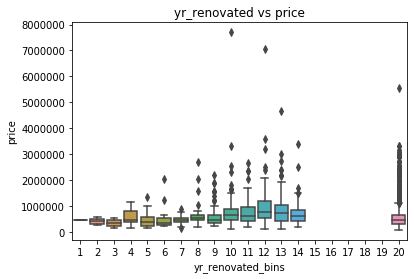

In [77]:
df_yr_ren = df.loc[(df['yr_renovated'] != 9999.0) & (df['yr_renovated'] != 0.0),]
df_yr_ren[('yr_renovated' + '_bins')] = pd.cut(df_yr_ren['yr_renovated'], 20, labels = list(range(1,21)))

sns.boxplot('yr_renovated_bins', 'price', data=df_yr_ren).set_title('yr_renovated vs price')

In [78]:
df = df.loc[df['bedrooms'] < 33]

In [79]:
df = df.loc[df['sqft_lot'] < 1651359]

In [80]:
df_without_outliers = pd.DataFrame(None)

for i in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'
          ,'floors', 'sqft_above','sqft_basement'
          ,'sqft_living15', 'sqft_lot15']:
    
    data_mean, data_std = np.mean(df[str(i)]), np.std(df[str(i)])
    # identify outliers
    cut_off = data_std * 3
    upper = data_mean + cut_off
    df_without_outliers[str(i) + '_outlier_flag'] = (df[str(i)] >= upper)
        
        
df_without_outliers = df_without_outliers.replace(True,np.nan).dropna(axis = 0, how = 'any')

In [81]:
df_without_outliers

,price_outlier_flag,bedrooms_outlier_flag,bathrooms_outlier_flag,sqft_living_outlier_flag,sqft_lot_outlier_flag,floors_outlier_flag,sqft_above_outlier_flag,sqft_basement_outlier_flag,sqft_living15_outlier_flag,sqft_lot15_outlier_flag
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
indexes_to_keep = df_without_outliers.index

print(indexes_to_keep)
len(indexes_to_keep)


Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,     9,
               11,
            ...
            21587, 21588, 21589, 21590, 21591, 21592, 21593, 21594, 21595,
            21596],
           dtype='int64', length=20235)


20235

In [83]:
df_without_outlier_rows = df.ix[indexes_to_keep]

len(df_without_outlier_rows)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


20235

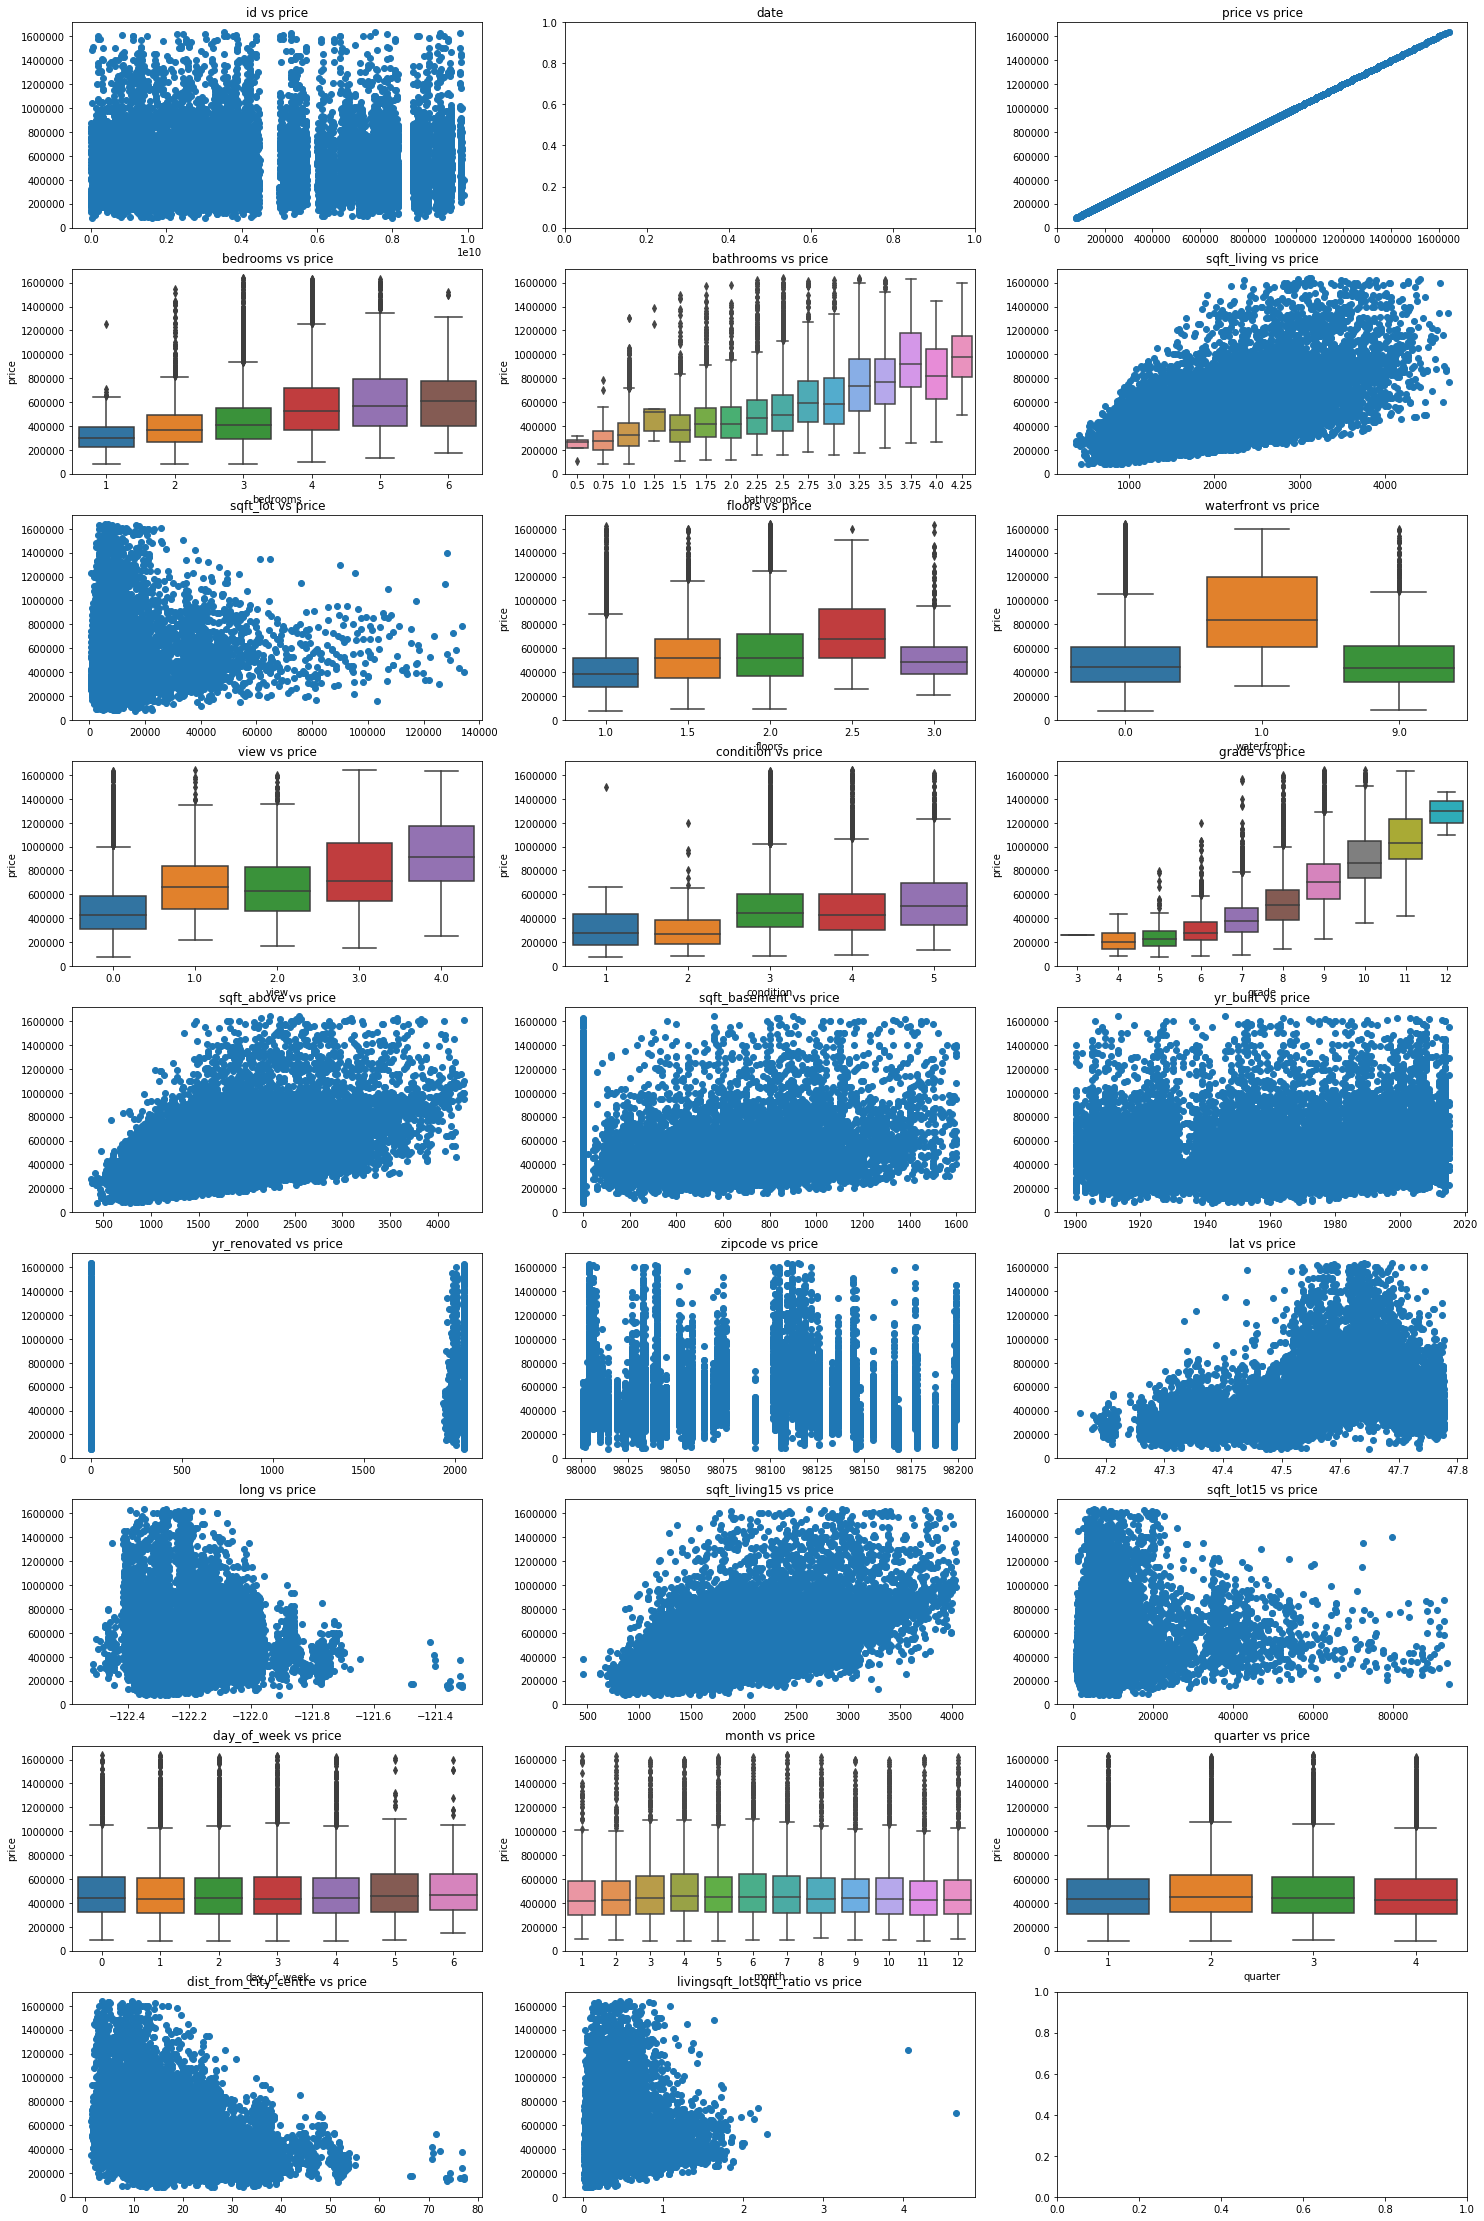

In [84]:
fig3, axes3 = plt.subplots(9, 3, figsize = (25,40))
axes3.shape


for n in range(1,27):
    
    i = df_without_outlier_rows.dtypes.index[n-1]
    
    row = (n-1)//3
    col = (n-1)%3
    
    if str(type(df_without_outlier_rows[str(i)][0])) in ["<class 'numpy.float64'>", "<class 'numpy.int64'>"]:
        
        if (len(df_without_outlier_rows[str(i)].unique()) > 12) and (str(i) not in ['bathrooms']):
        
            ax = axes3[row][col]
            ax.scatter(df_without_outlier_rows[str(i)], df_without_outlier_rows['price'])
            ax.set_title('{}'.format(i) + ' vs price')
            
        
        else:
            ax = axes3[row][col]
            sns.boxplot(str(i), 'price', data=df_without_outlier_rows, ax=ax)
            ax.set_title('{}'.format(i) + ' vs price')
    else:   
        ax = axes3[row][col]
        ax.set_title('{}'.format(i))
        continue

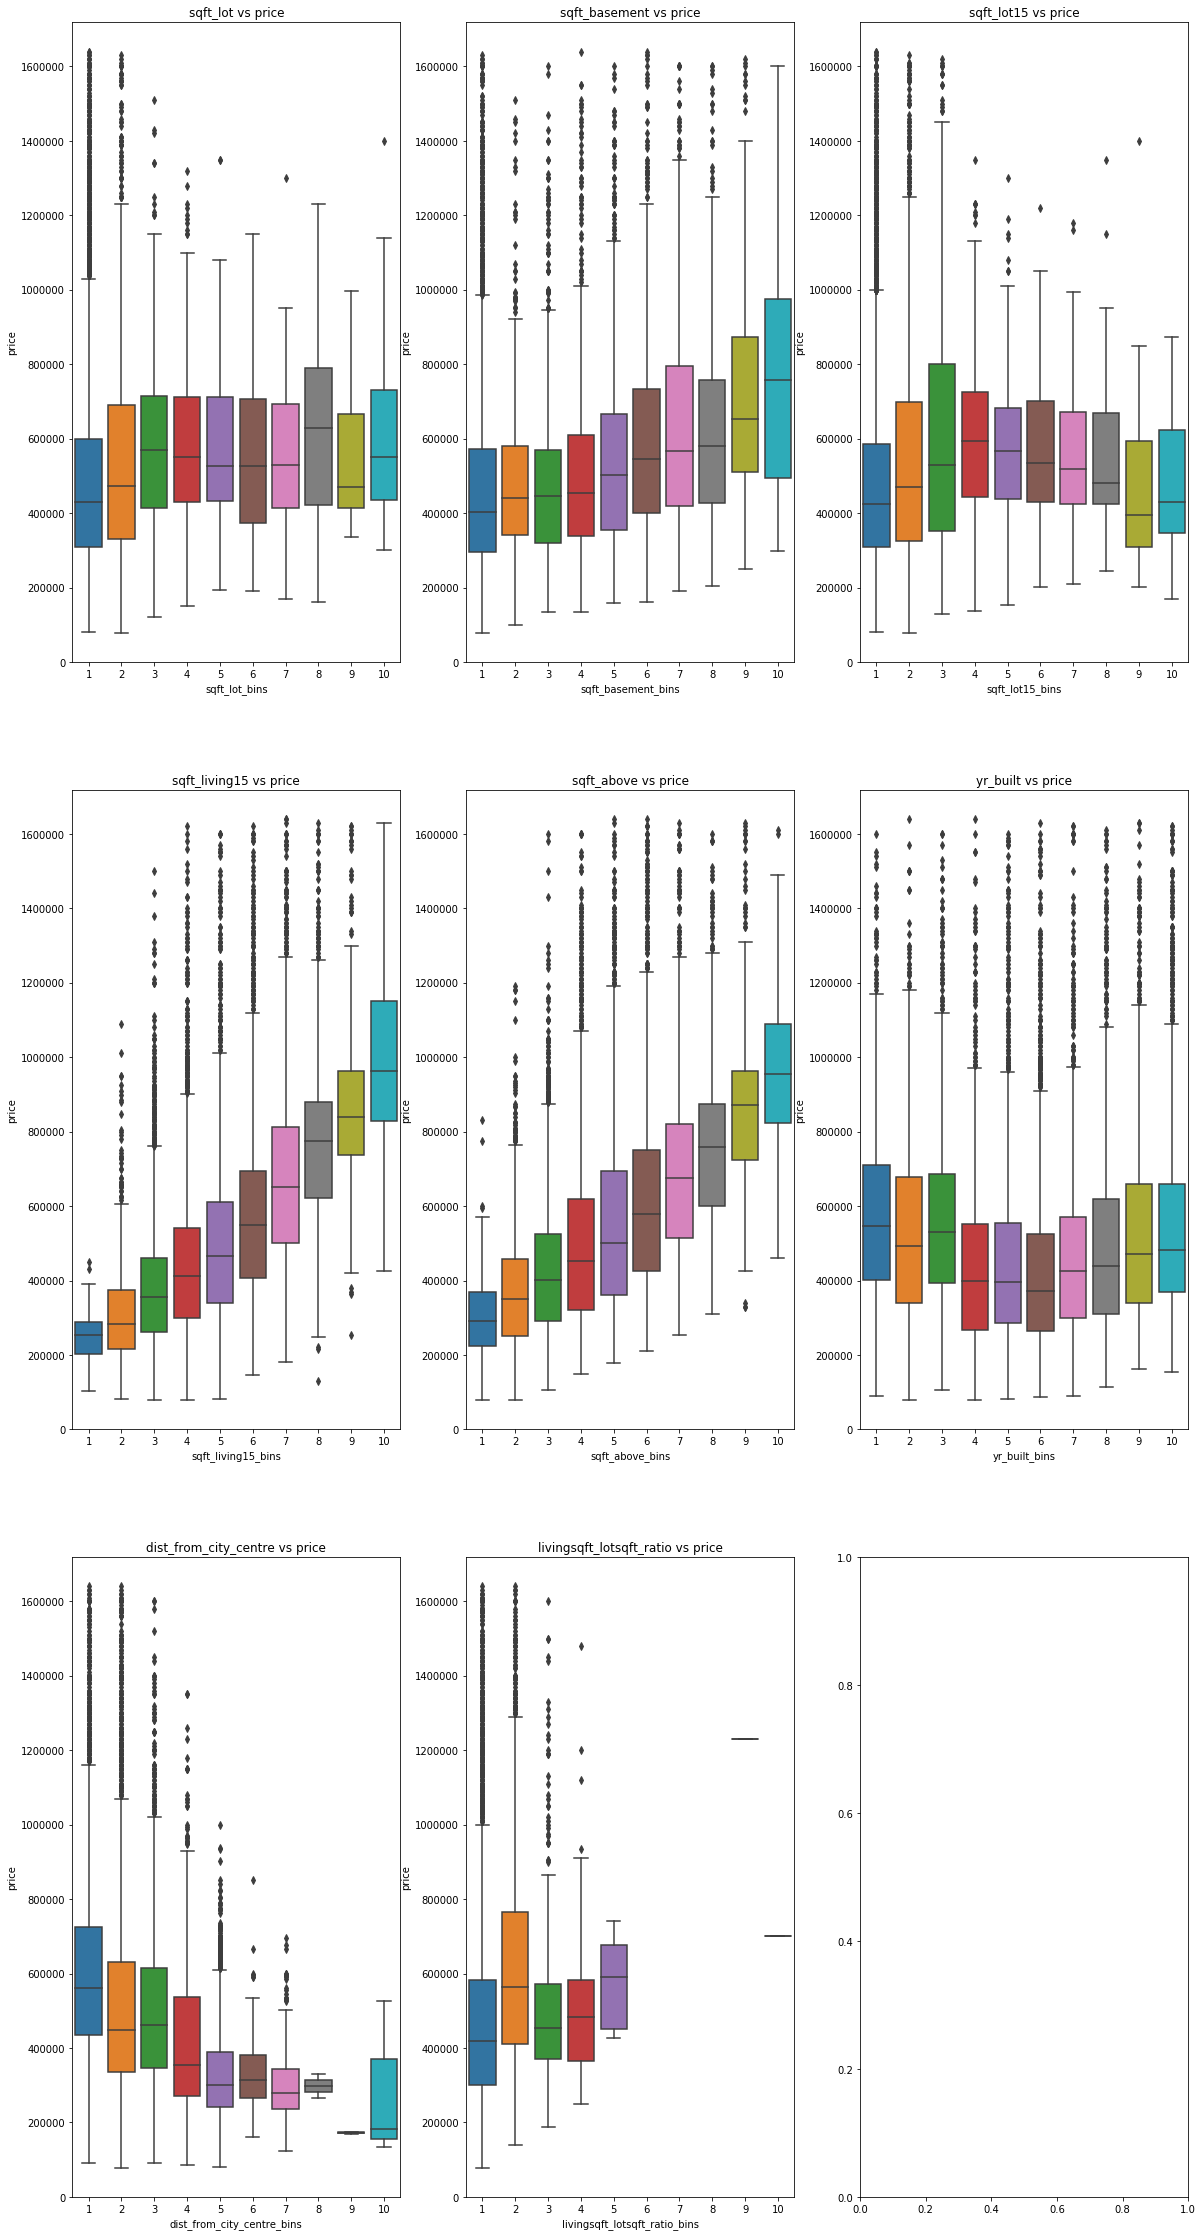

In [85]:
outl_vars = ['sqft_lot', 'sqft_basement', 'sqft_lot15', 'sqft_living15'
             ,'sqft_above', 'yr_built', 'dist_from_city_centre'
             ,'livingsqft_lotsqft_ratio']


for i in outl_vars:
    
    df_without_outlier_rows[(str(i) + '_bins')] = pd.cut(df_without_outlier_rows[str(i)], 10, labels = list(range(1,11)))
    
    


def remove_outliers_and_plot_grouped_boxes(list_of_vars):
    
    fig2, axes2 = plt.subplots(3, 3, figsize = (20,40))

   
    n = (-1)
    for i in list_of_vars:
        
        n += 1
        
        row = (n)//3
        col = (n)%3
        
        ax = axes2[row][col]
        sns.boxplot((str(i) + '_bins'), 'price', data=df_without_outlier_rows, ax=ax)
        ax.set_title('{}'.format(str(i)) + ' vs price')
    

    n = (-1)  
        
remove_outliers_and_plot_grouped_boxes(outl_vars)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'yr_renovated vs price')

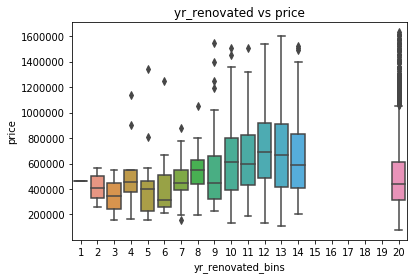

In [86]:
df_yr_ren = df_without_outlier_rows.loc[(df_without_outlier_rows['yr_renovated'] != 9999.0) & (df_without_outlier_rows['yr_renovated'] != 0.0),]
df_yr_ren[('yr_renovated' + '_bins')] = pd.cut(df_yr_ren['yr_renovated'], 20, labels = list(range(1,21)))

sns.boxplot('yr_renovated_bins', 'price', data=df_yr_ren).set_title('yr_renovated vs price')

In [88]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_week,month,quarter,dist_from_city_centre,livingsqft_lotsqft_ratio,sqft_lot_bins,sqft_basement_bins,sqft_lot15_bins,sqft_living15_bins,sqft_above_bins,yr_built_bins,dist_from_city_centre_bins,livingsqft_lotsqft_ratio_bins
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,9.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,4,12.479186,0.208850,1,1,1,2,1,5,2,1
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,4,12.331758,0.354874,1,1,1,3,2,5,2,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,2050.0,98028,47.7379,-122.233,2720,8062,2,2,1,16.057023,0.077000,1,1,1,4,1,3,2,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,12,4,10.922917,0.392000,1,2,1,2,1,6,2,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2,1,21.688510,0.207921,1,1,1,3,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2,5,2,9.906291,1.352785,1,1,1,2,2,10,2,3
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,2,1,11.307470,0.397385,1,1,1,3,3,10,2,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,6,2,3.190108,0.755556,1,1,1,2,1,10,1,2
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,9.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,4,1,1,21.619531,0.670017,1,1,1,2,2,10,3,2


In [89]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_week,month,quarter,dist_from_city_centre,livingsqft_lotsqft_ratio,sqft_lot_bins,sqft_basement_bins,sqft_lot15_bins,sqft_living15_bins,sqft_above_bins,yr_built_bins,dist_from_city_centre_bins,livingsqft_lotsqft_ratio_bins
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,9.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,4,12.479186,0.208850,1,1,1,2,1,5,2,1
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,4,12.331758,0.354874,1,1,1,3,2,5,2,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,2050.0,98028,47.7379,-122.233,2720,8062,2,2,1,16.057023,0.077000,1,1,1,4,1,3,2,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,12,4,10.922917,0.392000,1,2,1,2,1,6,2,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2,1,21.688510,0.207921,1,1,1,3,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2,5,2,9.906291,1.352785,1,1,1,2,2,10,2,3
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,2,1,11.307470,0.397385,1,1,1,3,3,10,2,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,6,2,3.190108,0.755556,1,1,1,2,1,10,1,2
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,9.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,4,1,1,21.619531,0.670017,1,1,1,2,2,10,3,2


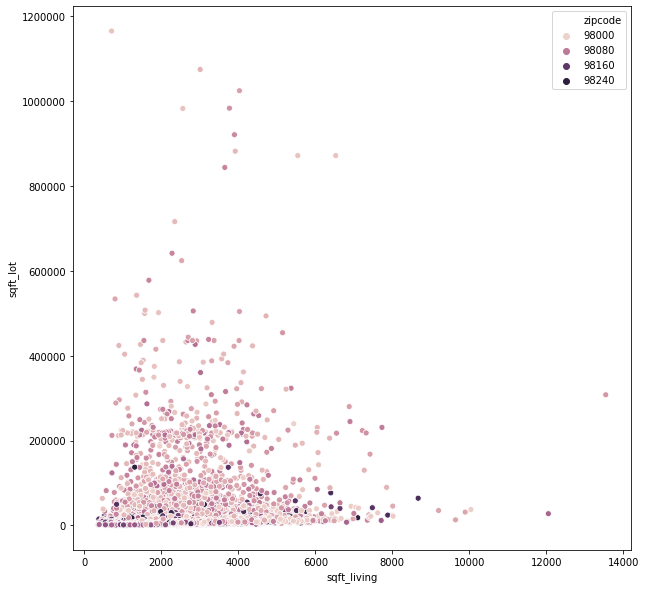

In [96]:
plt.figure(figsize=(10,10))
sqft_lot = sns.scatterplot(x="sqft_living", y="sqft_lot", hue = 'zipcode' , data=df_without_outlier_rows)

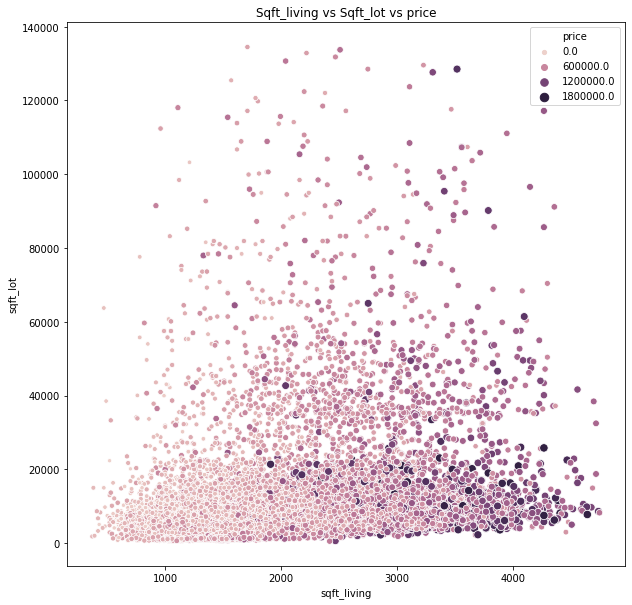

In [165]:
plt.figure(figsize=(10,10))
sqft_lot = sns.scatterplot(x="sqft_living", y="sqft_lot", hue = 'price', size="price",
                             data=df_without_outlier_rows).set_title(
                            'Sqft_living vs Sqft_lot, hue as price')

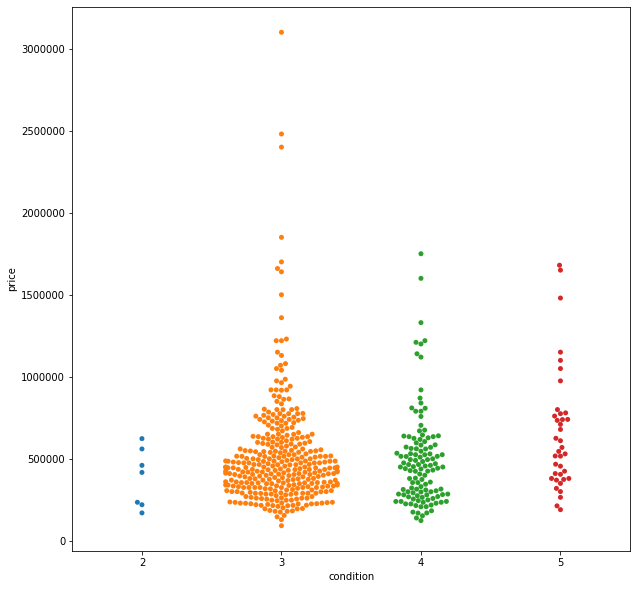

In [131]:
plt.figure(figsize=(10,10))
condition_plot = sns.swarmplot(data=random_subsetdf,x='condition', y='price')

In [157]:
random_subsetdf = df_without_outlier_rows.sample(n=5000)

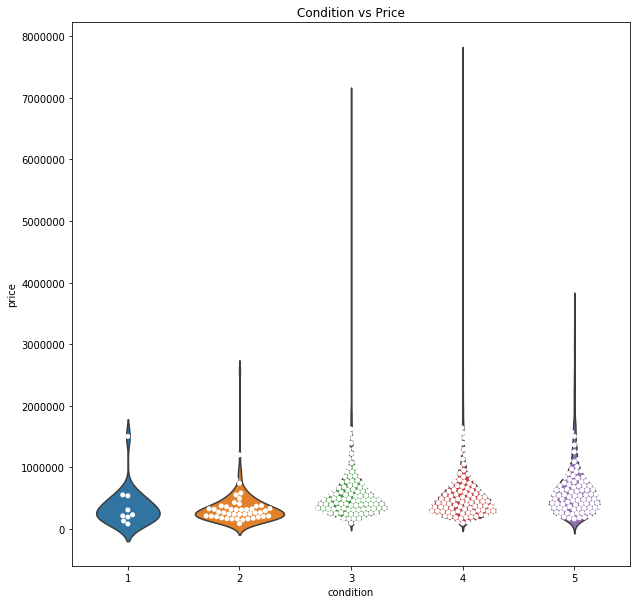

In [166]:
plt.figure(figsize=(10,10))
condition_plot1 = sns.violinplot(x="condition", y="price", data=df, inner = None)
condition_plot2 = sns.swarmplot(data=random_subsetdf,x='condition', y='price', color = '1').set_title(
                                'Condition vs Price')

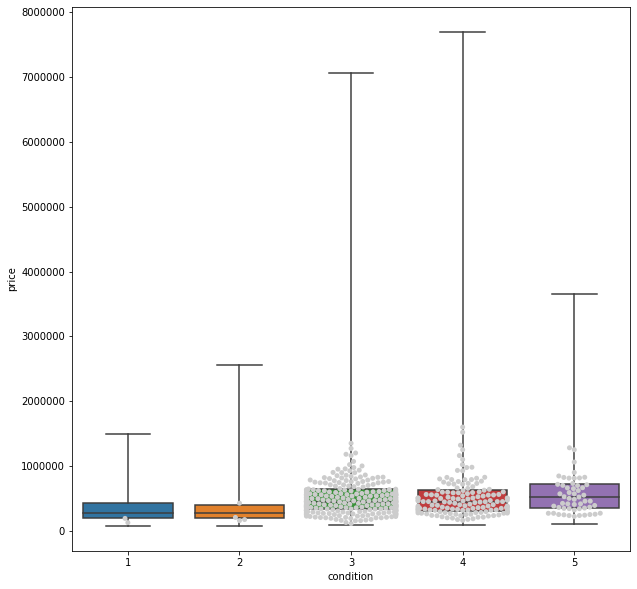

In [155]:
plt.figure(figsize=(10,10))
condition_plot1 = sns.boxplot(x="condition", y="price", data=df, whis=np.inf)
condition_plot2 = sns.swarmplot(data=random_subsetdf,x='condition', y='price', color = '0.8')

In [133]:
df_without_outlier_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_week,month,quarter,dist_from_city_centre,livingsqft_lotsqft_ratio,sqft_lot_bins,sqft_basement_bins,sqft_lot15_bins,sqft_living15_bins,sqft_above_bins,yr_built_bins,dist_from_city_centre_bins,livingsqft_lotsqft_ratio_bins
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,9.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,4,12.479186,0.208850,1,1,1,3,3,5,2,1
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,4,12.331758,0.354874,1,3,1,4,5,5,2,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,2050.0,98028,47.7379,-122.233,2720,8062,2,2,1,16.057023,0.077000,1,1,1,7,2,3,2,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,12,4,10.922917,0.392000,1,6,1,3,2,6,2,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2,1,21.688510,0.207921,1,1,1,4,4,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2,5,2,9.906291,1.352785,1,1,1,3,3,10,2,3
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,2,1,11.307470,0.397385,1,1,1,4,5,10,2,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,6,2,3.190108,0.755556,1,1,1,2,2,10,1,2
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,9.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,4,1,1,21.619531,0.670017,1,1,1,3,4,10,3,2


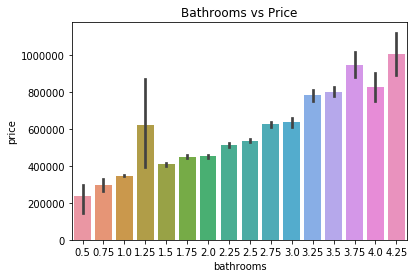

In [178]:
nuplot1 = sns.barplot(x = 'bathrooms' , y = 'price', data=df_without_outlier_rows).set_title(
                        'Bathrooms vs Price')

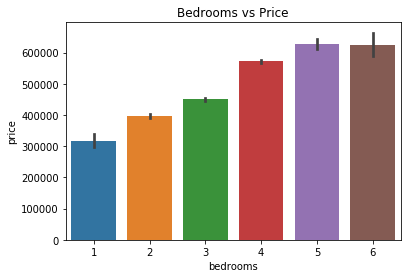

In [182]:
nuplot2 = sns.barplot(x = 'bedrooms' , y = 'price', data=df_without_outlier_rows).set_title(
                        'Bedrooms vs Price')